step 1: collecting data


In [28]:
#step 1 : collecting data
import pandas as pd
import numpy as np
import seaborn as sns #for statistical plotting
import matplotlib.pyplot as plt
import math
%matplotlib inline
data=pd.read_csv('suv_data.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


step 2: analyzing the data

In [29]:
print('number of customers',str(len(data.index)))

number of customers 400


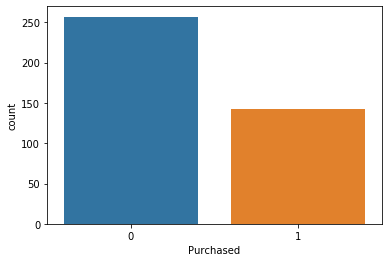

In [30]:
sns.countplot(x='Purchased',data=data)

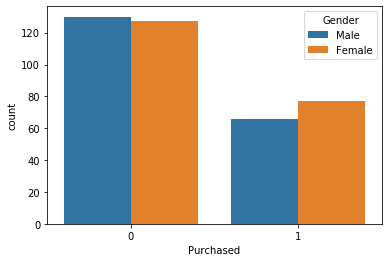

In [31]:
#sex count
sns.countplot(x='Purchased',hue='Gender',data=data)

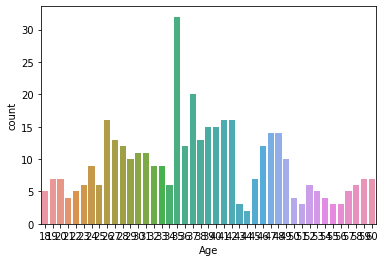

In [32]:
sns.countplot(x="Age",data=data)

step 3: data wrangling


In [33]:
data.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [34]:
data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [35]:
#dummies
gender=pd.get_dummies(data["Gender"],drop_first=True)
gender.head(3)

,Male
0,1
1,1
2,0


In [36]:
#now concatanate the new column
data=pd.concat([data,gender],axis=1)
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0


In [37]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [38]:
#nnow dropping the unnecessary column
data.drop(['Gender','User ID'],axis=1,inplace=True)
data.head(5)

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


step 4: train data

In [39]:
X=data.iloc[:,[0,1,3]].values
Y=data.iloc[:,[2]].values

In [40]:
#split the dataset
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [59]:
from sklearn.linear_model import LogisticRegression


In [60]:
 from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [62]:
log_model= LogisticRegression()

In [63]:
log_model.fit(X_train,y_train)

C:\Users\klikh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\klikh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
predictions=log_model.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.91      0.92        68\n           1       0.82      0.84      0.83        32\n\n    accuracy                           0.89       100\n   macro avg       0.87      0.88      0.87       100\nweighted avg       0.89      0.89      0.89       100\n'

In [67]:
from sklearn.metrics import confusion_matrix

In [68]:
confusion_matrix(y_test,predictions)

array([[62,  6],
       [ 5, 27]], dtype=int64)

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.89